## Problem Statement
* Analyzed 80 cereals to understand the factors that affect their ratings. 

In [1]:
# data wrangling
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter("ignore")

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Data modeling
from sklearn.cluster import KMeans

In [2]:
# import data

df = pd.read_csv("cereal.csv")

In [3]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [4]:
df.tail()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193
76,Wheaties Honey Gold,G,C,110,2,1,200,1.0,16.0,8,60,25,1,1.0,0.75,36.187559


In [5]:
# check for missing value

df.isnull().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [7]:
# basic statistics and information

df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [8]:
df['name'].unique()
df['name'].value_counts()

name
100% Bran                    1
Nutri-Grain Almond-Raisin    1
Quaker Oat Squares           1
Puffed Wheat                 1
Puffed Rice                  1
                            ..
Frosted Flakes               1
Froot Loops                  1
Double Chex                  1
Crispy Wheat & Raisins       1
Wheaties Honey Gold          1
Name: count, Length: 77, dtype: int64

Text(0, 0.5, 'frequency')

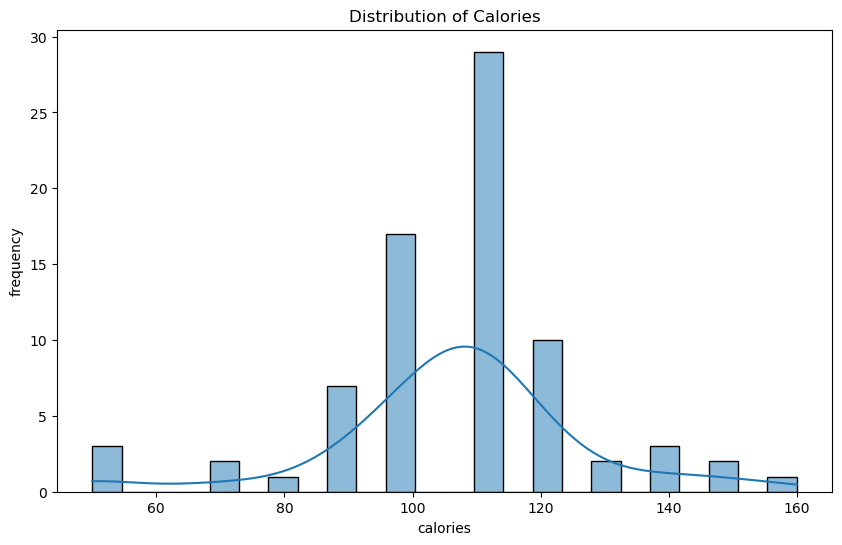

In [9]:
# calories Distribution analysis

plt.figure(figsize = (10, 6))
sns.histplot(df, x="calories", kde=True)
plt.title('Distribution of Calories')
plt.xlabel('calories')
plt.ylabel('frequency')


##### The distribution is slightly right-skewed, meaning more cereals have lower calories than higher calories. This could indicate a focus on keeping calories at a moderate level for most cereals.
#### Insights
* Most cereals have between 90 and 110 calories
* Few cereals have very low calories (below 60) and very high calories (above 140)
#### Findings
* Most cereals fall into the 90-110 calorie range, making it a common target for cereal manufacturers.
* The presence of more low-calorie cereals compared to high-calorie ones may reflect an industry trend towards healthier, lower-calorie options.

In [10]:
# Top 10 ranking by rating

df.nlargest(10, 'rating')

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,93.704912
64,Shredded Wheat 'n'Bran,N,C,90,3,0,0,4.0,19.0,0,140,0,1,1.00,0.67,74.472949
65,Shredded Wheat spoon size,N,C,90,3,0,0,3.0,20.0,0,120,0,1,1.00,0.67,72.801787
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,68.402973
63,Shredded Wheat,N,C,80,2,0,0,3.0,16.0,0,95,0,1,0.83,1.00,68.235885
20,Cream of Wheat (Quick),N,H,100,3,0,80,1.0,21.0,0,-1,0,2,1.00,1.00,64.533816
55,Puffed Wheat,Q,C,50,2,0,0,1.0,10.0,0,50,0,3,0.50,1.00,63.005645
54,Puffed Rice,Q,C,50,1,0,0,0.0,13.0,0,15,0,3,0.50,1.00,60.756112
50,Nutri-grain Wheat,K,C,90,3,0,170,3.0,18.0,2,90,25,3,1.00,1.00,59.642837
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.00,0.33,59.425505


In [11]:
# Bottom ranking by rating

df.nsmallest(10, 'rating')

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
10,Cap'n'Crunch,Q,C,120,1,2,220,0.0,12.0,12,35,25,2,1.0,0.75,18.042851
12,Cinnamon Toast Crunch,G,C,120,1,3,210,0.0,13.0,9,45,25,2,1.0,0.75,19.823573
35,Honey Graham Ohs,Q,C,120,1,2,220,1.0,12.0,11,45,25,2,1.0,1.00,21.871292
18,Count Chocula,G,C,110,1,1,180,0.0,12.0,13,65,25,2,1.0,1.00,22.396513
14,Cocoa Puffs,G,C,110,1,1,180,0.0,12.0,13,55,25,2,1.0,1.00,22.736446
31,Golden Grahams,G,C,110,1,1,280,0.0,15.0,9,45,25,2,1.0,0.75,23.804043
42,Lucky Charms,G,C,110,2,1,180,0.0,12.0,12,55,25,2,1.0,1.00,26.734515
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
29,Fruity Pebbles,P,C,110,1,1,135,0.0,13.0,12,25,25,2,1.0,0.75,28.025765
70,Total Raisin Bran,G,C,140,3,1,190,4.0,15.0,14,230,100,3,1.5,1.00,28.592785


In [12]:
dff= df[['calories','protein','fat','sodium','fiber','carbo','sugars','potass','vitamins','shelf','weight','cups','rating']]

In [23]:
# Correlation matrix

corr_matrix = dff.corr()
corr_matrix

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
calories,1.000000,0.019066,0.498610,0.300649,-0.293413,0.250681,0.562340,-0.066609,0.265356,0.097234,0.696091,0.087200,-0.689376
protein,0.019066,1.000000,0.208431,-0.054674,0.500330,-0.130864,-0.329142,0.549407,0.007335,0.133865,0.216158,-0.244469,0.470618
fat,0.498610,0.208431,1.000000,-0.005407,0.016719,-0.318043,0.270819,0.193279,-0.031156,0.263691,0.214625,-0.175892,-0.409284
sodium,0.300649,-0.054674,-0.005407,1.000000,-0.070675,0.355983,0.101451,-0.032603,0.361477,-0.069719,0.308576,0.119665,-0.401295
fiber,-0.293413,0.500330,0.016719,-0.070675,1.000000,-0.356083,-0.141205,0.903374,-0.032243,0.297539,0.247226,-0.513061,0.584160
carbo,0.250681,-0.130864,-0.318043,0.355983,-0.356083,1.000000,-0.331665,-0.349685,0.258148,-0.101790,0.135136,0.363932,0.052055
sugars,0.562340,-0.329142,0.270819,0.101451,-0.141205,-0.331665,1.000000,0.021696,0.125137,0.100438,0.450648,-0.032358,-0.759675
potass,-0.066609,0.549407,0.193279,-0.032603,0.903374,-0.349685,0.021696,1.000000,0.020699,0.360663,0.416303,-0.495195,0.380165
vitamins,0.265356,0.007335,-0.031156,0.361477,-0.032243,0.258148,0.125137,0.020699,1.000000,0.299262,0.320324,0.128405,-0.240544
shelf,0.097234,0.133865,0.263691,-0.069719,0.297539,-0.101790,0.100438,0.360663,0.299262,1.000000,0.190762,-0.335269,0.025159


Text(0.5, 1.0, 'Correlation Matrix of Nutritional Values')

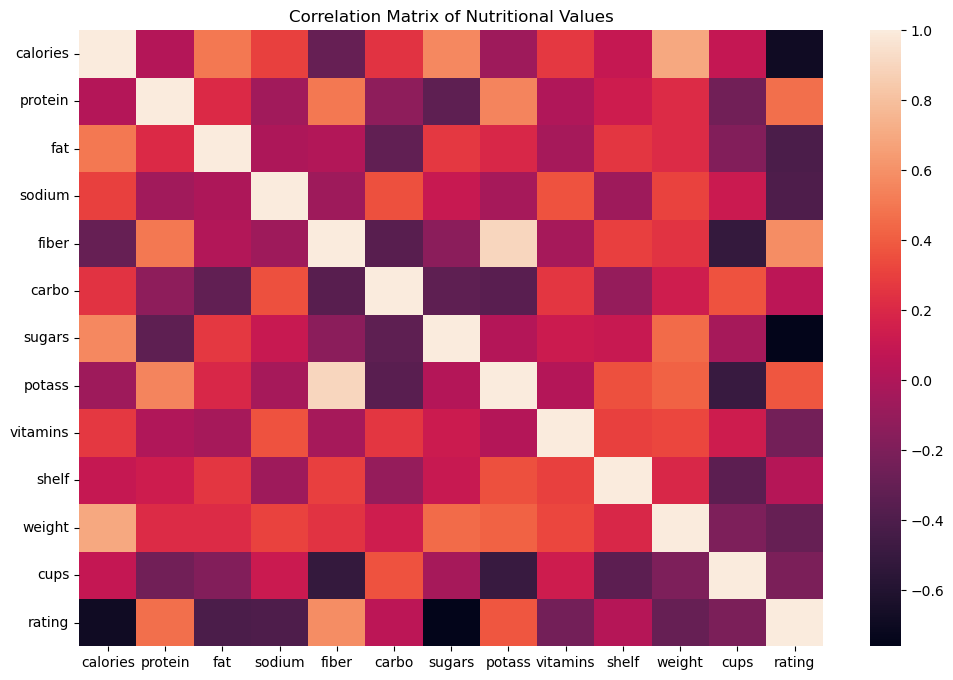

In [13]:
# Correlation matrix

corr_matrix = dff.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix)
plt.title('Correlation Matrix of Nutritional Values')

### Insights
* There is a strong positive correlation (0.56) between calories and sugars. This means that cereals with higher calories tend to have more sugar.
* There is a moderate positive correlation (0.50) between calories and fat. Higher-calorie cereals also tend to have more fat.
* There is a strong negative correlation (-0.76) between rating and sugars. This indicates that cereals with higher sugar content tend to have lower ratings.
* There is a strong negative correlation (-0.69) between rating and calories. Cereals with higher calories generally have lower ratings.
* There is a moderate positive correlation (0.50) between fiber and protein. Cereals high in fiber tend to have more protein as well.
* There is a moderate positive correlation (0.58) between fiber and rating. Higher fiber content is associated with better ratings.

### Findings
#### Healthier Cereals
* Cereals with lower calories and sugar tend to have higher ratings, suggesting that consumers prefer healthier options.
* Higher fiber content positively affects the cereal ratings, indicating a preference for fiber-rich cereals.
#### Nutritional Profile
* Cereals with higher fat content also have higher calories, which is expected since fat is calorie-dense.
* There is a strong relationship between sugar content and calories, highlighting the need to balance these nutrients for healthier cereals.
#### Consumer Preferences
* Consumers seem to rate cereals with lower sugar and calorie content more favorably.
* Fiber and protein are important for higher ratings, showing consumer preference for more nutritious cereals.

In [28]:
# K-Means clustering

kmeans = KMeans(n_clusters=3)
df['cluster'] = kmeans.fit_predict(df[['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass',
                                       'vitamins', 'shelf', 'weight', 'cups', 'rating']])


Text(0, 0.5, 'Rating')

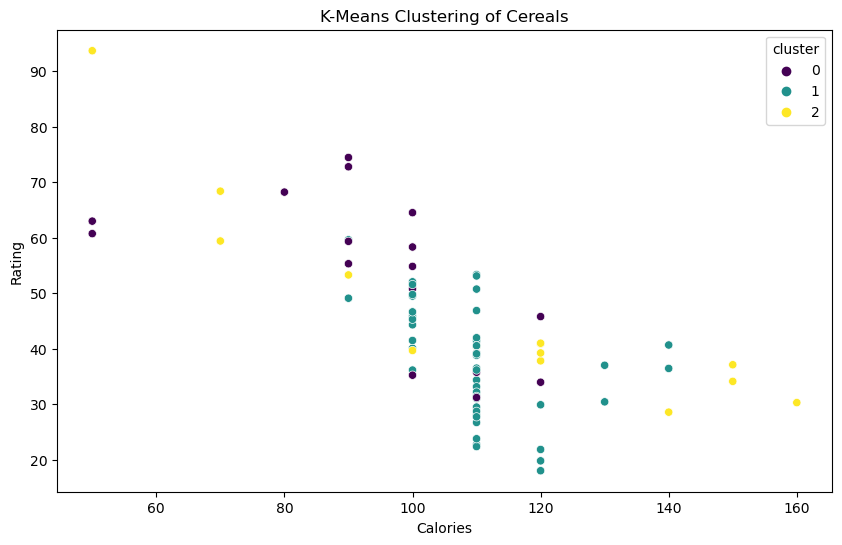

In [29]:
# K-Means clustering

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='calories', y='rating', hue='cluster', palette='viridis')
plt.title('K-Means Clustering of Cereals')
plt.xlabel('Calories')
plt.ylabel('Rating')

### Insights
#### Cluster 0 (Purple):
* These cereals have a wide range of calories, from around 60 to 160.
* They have ratings mostly between 20 and 50, with a few higher-rated cereals around 60.
#### Cluster 1 (Green):
* These cereals are mostly in the mid-range of calories, approximately 70 to 120.
* The ratings for these cereals vary widely, from around 30 to 70, with a few reaching up to 90.
#### Cluster 2 (Yellow):
* These cereals have lower calorie counts, mostly around 60 to 110.
* Their ratings are generally higher, between 50 and 90.
### Findings
* Cereals with lower calories tend to have higher ratings, as seen in cluster 2 (yellow).
* Cereals with mid-range calories (cluster 1, green) have a wide range of ratings, indicating other factors might influence their ratings.
* Cereals with a broader range of calories (cluster 0, purple) generally have lower ratings, with few exceptions.

## RECOMMENDATIONS
* Cereals with lower calorie counts generally have higher ratings. Developing more low-calorie options could attract health-conscious consumers and improve product ratings.
* Cereals with higher sugar content tend to have lower ratings. Reducing the sugar levels in cereals can make them more appealing to consumers who prefer healthier options.
* Cereals with higher fiber content receive better ratings. Adding more fiber to cereals can enhance their nutritional value and increase consumer satisfaction.
* Cereals with calories in the mid-range (around 70 to 120) show a wide range of ratings. Ensure these cereals have balanced nutrition and good taste to appeal to a broader audience.
* While there is a moderate positive correlation between calories and fat, excessive fat can lower ratings. Keep fat content at a moderate level to maintain a good balance between taste and health.
* Clearly communicate the nutritional benefits of low-calorie, high-fiber, and low-sugar cereals on packaging and marketing materials. Educate consumers on the health benefits to attract more health-conscious buyers.
* Offer a variety of cereals that cater to different dietary preferences and nutritional needs. This includes options for low-calorie, high-fiber, and low-sugar cereals to meet diverse consumer demands.

## CONCLUSION
##### Cereals with lower calories and higher fiber content tend to have higher ratings, while cereals with higher sugar content generally receive lower ratings. However, many cereals still have a wide range of calories and varying sugar levels, which can impact their overall appeal to consumers.